## Задание 1. Глубокое обучение в компьютерном зрении.

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
image_path = 'drive/MyDrive/07_cv/01_cv/seagull.jpg'

In [110]:
img = imageio.imread(image_path)
img = img.astype(np.float32) / 255.
print(img.shape)

(1280, 720, 3)


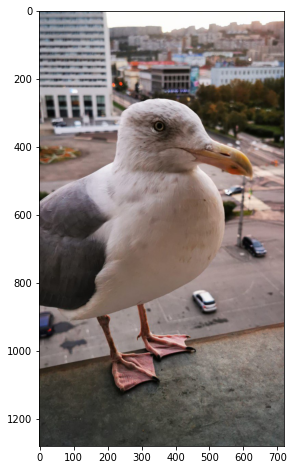

In [111]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

## Изменение яркости

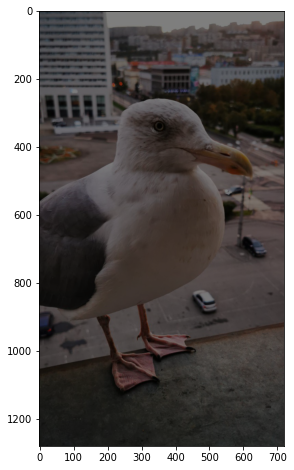

In [112]:
# уменьшение линейное
plt.figure(figsize=(8,8))
plt.imshow(img/2)

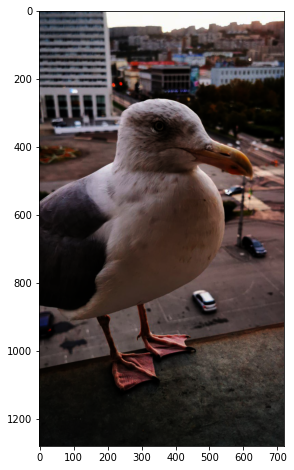

In [113]:
# уменьшение нелинейное
plt.figure(figsize=(8,8))
plt.imshow(img**2)

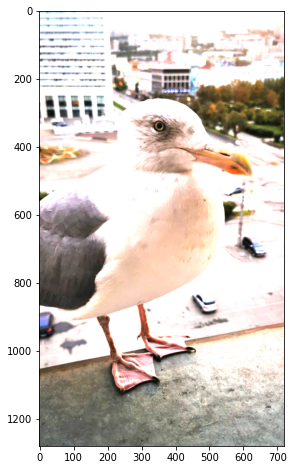

In [114]:
# увеличение линейное
plt.figure(figsize=(8,8))
plt.imshow(img*2)

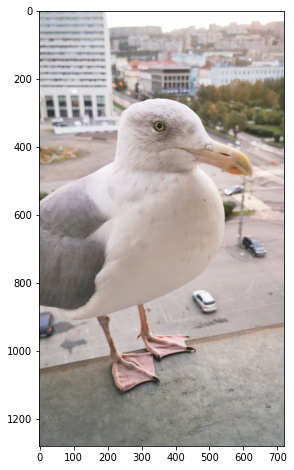

In [115]:
# нелинейное увеличение
plt.figure(figsize=(8,8))
plt.imshow(img**.5)

## Получение ЧБ изображения по цветному

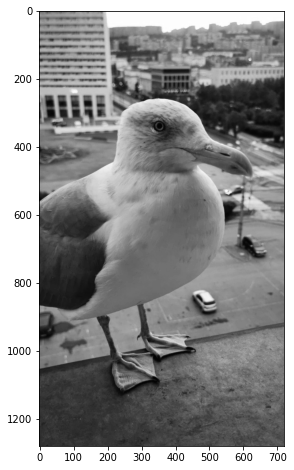

In [116]:
img_bw = np.mean(img, axis=2)
plt.figure(figsize=(8,8))
plt.imshow(img_bw, cmap='gray')

# Перевод в другое пространство

In [117]:
from skimage.color import rgb2hsv, hsv2rgb

In [118]:
img_hsv = rgb2hsv(img)
img_hsv[:5, :5, :]

array([[[0.5740741 , 0.37499997, 0.47058824],
        [0.5740741 , 0.36585364, 0.48235294],
        [0.5740741 , 0.35999998, 0.49019608],
        [0.5740741 , 0.3629032 , 0.4862745 ],
        [0.5740741 , 0.3629032 , 0.4862745 ]],

       [[0.5740741 , 0.38793102, 0.45490196],
        [0.5740741 , 0.37815124, 0.46666667],
        [0.56589144, 0.36134452, 0.46666667],
        [0.5731707 , 0.34166664, 0.47058824],
        [0.5731707 , 0.34166664, 0.47058824]],

       [[0.56837606, 0.34210524, 0.44705883],
        [0.56837606, 0.3333333 , 0.45882353],
        [0.56837606, 0.325     , 0.47058824],
        [0.56837606, 0.325     , 0.47058824],
        [0.5745614 , 0.31404957, 0.4745098 ]],

       [[0.5648148 , 0.29752064, 0.4745098 ],
        [0.5648148 , 0.29032257, 0.4862745 ],
        [0.5648148 , 0.28571427, 0.49411765],
        [0.5648148 , 0.28571427, 0.49411765],
        [0.5735294 , 0.26984125, 0.49411765]],

       [[0.56666666, 0.23809522, 0.49411765],
        [0.56666666, 0.232

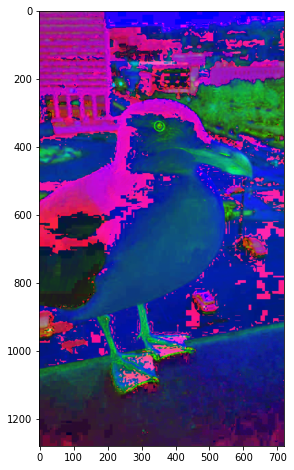

In [119]:
plt.figure(figsize=(8,8))
plt.imshow(img_hsv)

## Уменьшение насыщенности

In [120]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 4
img_new = hsv2rgb(img_hsv_new)

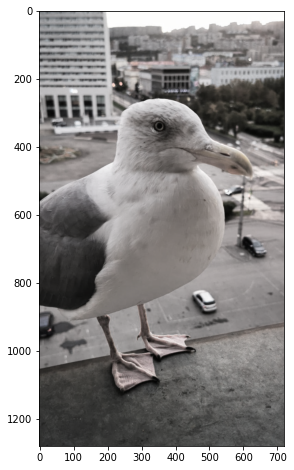

In [121]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Box blur

In [122]:
# Функция для прохождения маской по изображению

def img_proccess(img, w):

    out_img = np.zeros(
        (img.shape[0] - w.shape[0] + 1,
        img.shape[1] - w.shape[1] + 1,
        3,), 
        dtype=np.float32)

    for i in range(out_img.shape[0]):
        for j in range(out_img.shape[1]):
            x = img[i:i+w.shape[0], j:j+w.shape[1]]

            out_img[i,j,0] = np.sum(w * x[:,:,0])
            out_img[i,j,1] = np.sum(w * x[:,:,1])
            out_img[i,j,2] = np.sum(w * x[:,:,2])

    return out_img

In [123]:
win_size = (11, 11)
w = np.ones(win_size, dtype=np.float32)
w = w / np.sum(w)

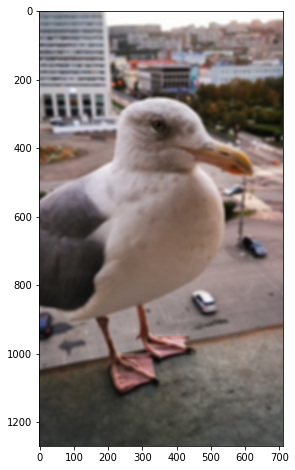

In [124]:
out_img = img_proccess(img, w)
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

## Gaussian blur

In [125]:
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                        -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

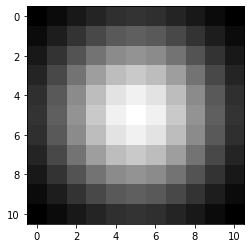

In [126]:
plt.imshow(w, cmap='gray')

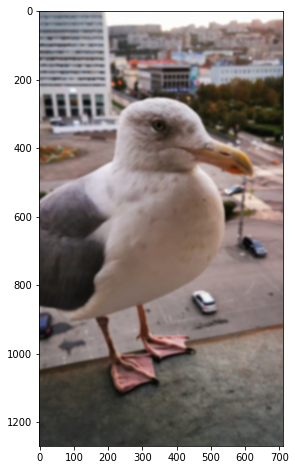

In [127]:
out_img = img_proccess(img, w)
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

## библиотека scipy.signal

In [128]:
import scipy.signal

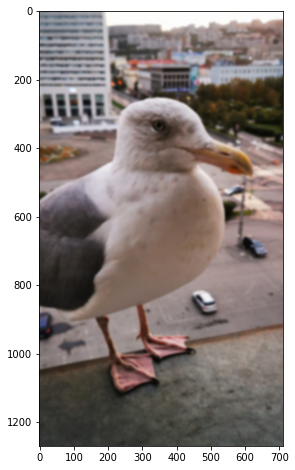

In [129]:
out_img = []

for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))

out_img = np.stack(out_img, axis=2)

plt.figure(figsize=(8, 8))
plt.imshow(out_img)

## Выделение вертикальных и горизонтальных линий

In [130]:
vertical_lines = np.array([[-1,-1,-1],
                           [ 0, 0, 0],
                           [ 1, 1, 1]])

horizontal_lines = np.array([[-1,0,1],
                             [-1,0,1],
                             [-1,0,1]]) 

# # Применим их к нашему изображению.
# img_border_horisont = img_mask(img, vertical_lines) 
# img_border_vert = img_mask(img, horizontal_lines)  

In [131]:
img_horizont = []
img_vertical = []

for c in range(3):
    img_horizont.append(scipy.signal.correlate2d(img[:,:,c], vertical_lines, mode='valid'))
    img_vertical.append(scipy.signal.correlate2d(img[:,:,c], horizontal_lines, mode='valid'))

img_horizont = np.stack(img_horizont, axis=2)
img_vertical = np.stack(img_vertical, axis=2)

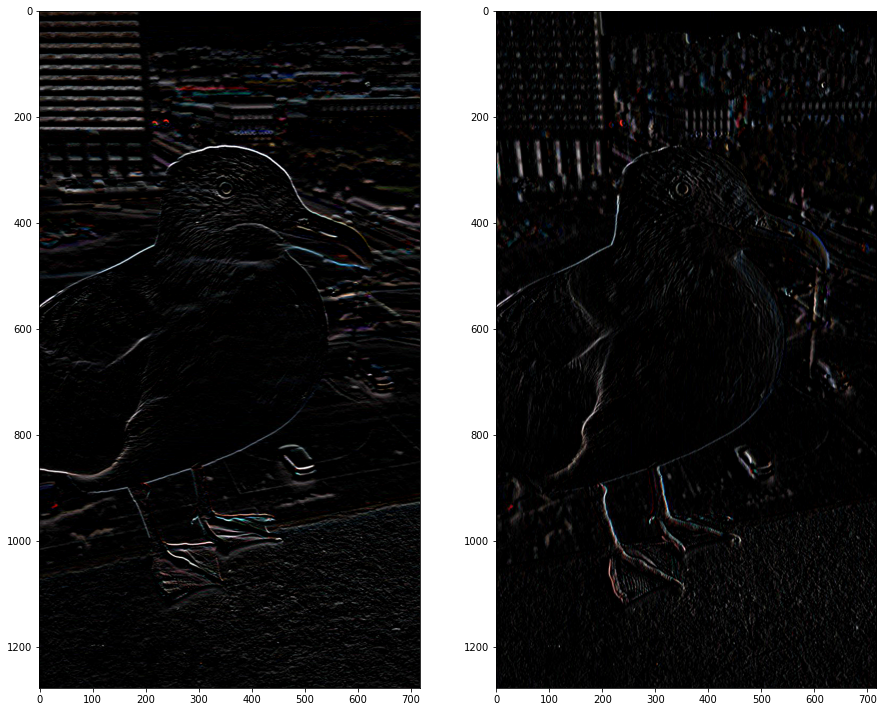

In [132]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

ax[0].imshow(img_horizont)
ax[1].imshow(img_vertical)
plt.show()

## Объединение изображений с вертикальными и горизонтальными линиями

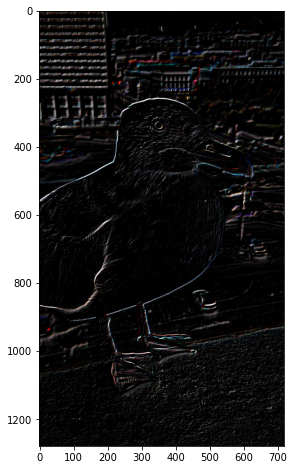

In [133]:
img_lines = img_horizont+img_vertical
plt.figure(figsize=(8, 8))
plt.imshow(img_lines)
plt.show()